# HOW ARE SKILLS TRENDING OVER TIME?

## METHODOLOGY
1. AGGREGATE SKILLS COUNT BY MONTH
2. RE-ANALYSE BASED ON PERCENTAGE OF TOTAL JOBS
3. PLOT THE CHART FOR THE DATA.

In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) 
    if isinstance(skill_list, str) else skill_list)


c:\Users\DeLL\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_IND = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

In [4]:
df_DA_IND['job_posted_month_no'] =  df_DA_IND['job_posted_date'].dt.month

In [5]:
df_DA_IND_explode = df_DA_IND.explode('job_skills')

In [15]:
df_DA_IND_pivot = df_DA_IND_explode.pivot_table(index='job_posted_month_no', columns= 'job_skills', aggfunc='size', fill_value=0)

df_DA_IND_pivot.loc['Total'] = df_DA_IND_pivot.sum()

df_DA_IND_pivot = df_DA_IND_pivot[df_DA_IND_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_IND_pivot = df_DA_IND_pivot.drop('Total')

df_DA_IND_pivot


job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,hugging face,fastapi,kotlin,powerbi,mariadb,sqlite,clickup,suse,twilio,centos
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,305,216,218,159,98,89,128,46,32,43,...,0,1,0,0,0,0,0,0,1,0
2,209,148,156,116,75,67,82,26,33,25,...,0,0,0,0,0,0,0,0,0,0
3,229,151,138,125,76,58,62,45,38,29,...,0,0,0,1,0,0,0,1,0,0
4,204,143,138,98,83,56,52,40,31,28,...,0,0,0,0,0,0,0,0,0,0
5,155,101,106,71,61,42,30,33,22,19,...,0,0,0,0,0,0,0,0,0,1
6,193,150,115,114,77,76,74,37,32,24,...,0,0,0,0,0,0,0,0,0,0
7,245,161,174,124,93,67,78,39,31,31,...,1,0,1,0,0,0,0,0,0,0
8,317,216,192,152,127,112,98,52,63,40,...,0,0,0,0,0,0,0,0,0,0
9,341,229,228,195,168,100,92,35,41,29,...,0,0,0,0,0,0,0,0,0,0


In [19]:
DA_TOTALS = df_DA_IND.groupby('job_posted_month_no').size()

In [22]:
df_DA_IND_percent = df_DA_IND_pivot.div(DA_TOTALS/100, axis=0)

In [25]:
#CHANGES MONTH NUMBER TO MONTH NAME
df_DA_IND_percent = df_DA_IND_percent.reset_index()
df_DA_IND_percent['job_posted_month'] = df_DA_IND_percent['job_posted_month_no'].apply(lambda x : pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_IND_percent = df_DA_IND_percent.set_index('job_posted_month')
df_DA_IND_percent = df_DA_IND_percent.drop(columns='job_posted_month_no')

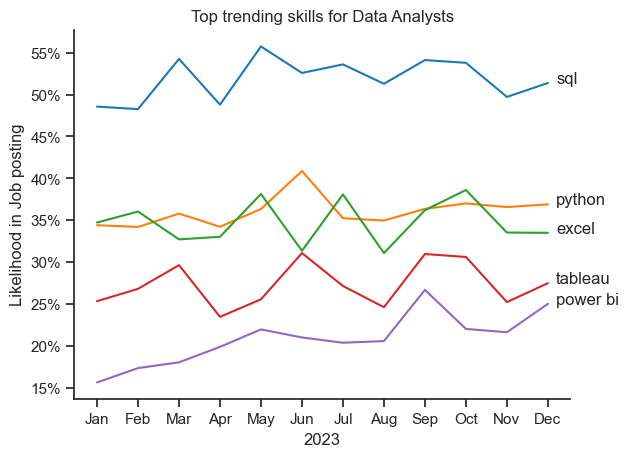

In [41]:
df_plot = df_DA_IND_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()


plt.title('Top trending skills for Data Analysts')
plt.ylabel('Likelihood in Job posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2,df_plot.iloc[-1,i], df_plot.columns[i])